In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("Wine_Quality_Data.csv")

In [5]:
data.shape

(6497, 13)

In [6]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
data.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
color                     2
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


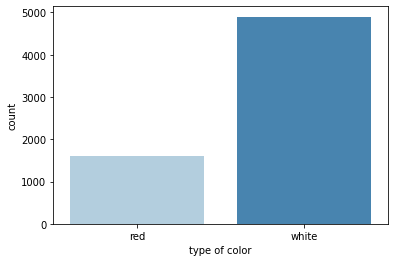

In [10]:
sns.countplot(x='color', data=data, palette='Blues')
plt.xlabel('type of color')
plt.show()

In [11]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [12]:
data['color'].replace({'red':'0',
          'white':'1'}, inplace=True)

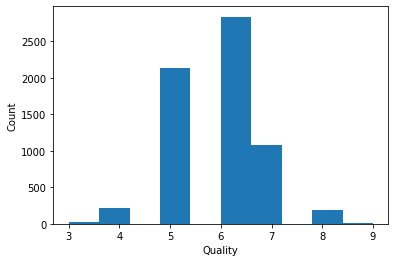

In [13]:
plt.hist(data['quality'], bins=10)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

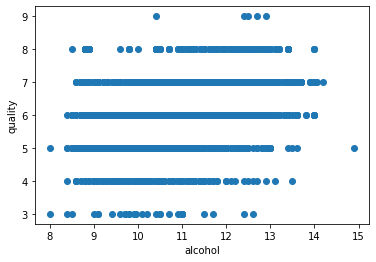

In [14]:
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(data['alcohol'], data['quality'] )
 
# x-axis label
ax.set_xlabel('alcohol')
 
# y-axis label
ax.set_ylabel('quality')
plt.show()

In [15]:
data['color'].value_counts()

1    4898
0    1599
Name: color, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['color'] = label_encoder.fit_transform(data['color'].astype(str))

In [17]:
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',
            'total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

X = data[features]
y = data['color']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [19]:
#prediction of train data

# Instantiate logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on train data
y_pred = lr.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9790263613623245
Precision: 0.9819888381532217
Recall: 0.9902788436940394
F1 Score: 0.9861164182906635


In [20]:
#prediction of test data
# Instantiate logistic regression model
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_test, y_test)

# Predict on test data
Y_pred = LR.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9723076923076923
Precision: 0.9769769769769769
Recall: 0.9868554095045501
F1 Score: 0.9818913480885312


# Hyper parameter tuning


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
hyperparameters = {'C': [0.01, 0.1,0.2,1, 10],
                   'penalty': ['l1', 'l2']}

In [23]:
grid_search = GridSearchCV(LR, hyperparameters, cv=5)

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.2, 1, 10], 'penalty': ['l1', 'l2']})

In [25]:
best_params = grid_search.best_params_

In [26]:
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train, y_train)

LogisticRegression(C=10)

In [27]:
y_train_pred=best_logistic_reg.predict(X_train)

accuracy = accuracy_score(y_train_pred, y_pred)
precision = precision_score(y_train_pred, y_pred)
recall = recall_score(y_train_pred, y_pred)
f1 = f1_score(y_train_pred, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9932653453915721
Precision: 0.9936580416032471
Recall: 0.9974535268652915
F1 Score: 0.9955521667302072


In [28]:
y_train_pred=best_logistic_reg.predict(X_test)
y_Pred = best_logistic_reg.predict(X_test)

In [29]:
print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)

Logistic Regression Accuracy: 0.9932653453915721
Logistic Regression Precision: 0.9936580416032471
Logistic Regression Recall: 0.9974535268652915
Logistic Regression F1 Score: 0.9955521667302072
